#### <h1><center>CSCI - 6409 The Process of Data Science - Summer 2022</h1></center>
<h1><center>Project</h1></center>
<h1><center>Stock Price Prediction using LSTM</h1></center>

<b>Trushita Maurya</b>  
B00913134 


<b>Nishit Mistry</b>  
B00911296  

### Downloading and Importing Libraries

In [ ]:
#Installing the necessary libraries
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install keras
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

### Dataset 1 - Tata Global Beverages Dataset

In [ ]:
df = pd.read_csv("/content/NSE-TATAGLOBAL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


### Data Analysis

In [ ]:
#Shape of data set
print(df.shape)

(2100, 8)


In [ ]:
#Columns of data set
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [ ]:
#Describe the data
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


### Data Quality Report

In [ ]:
#Adding the data types of our data:
data_types = pd.DataFrame(df.dtypes, columns = ['Data Type'])

#Checking for missing data:
missing_data = pd.DataFrame(df.isnull().sum(), columns = ['Missing Values'])

#Check if the values are unique:
unique_values = pd.DataFrame(columns = ['Unique Values'])
for row in list(df.columns.values):
    unique_values.loc[row] = [df[row].nunique()]
    
#If the min or max values are relevant, we can add:
minimum_values = pd.DataFrame(columns = ['Minimum Value'])
for row in list(df.columns.values):
    minimum_values.loc[row] = [df[row].min()]

#If the min or max values are relevant, we can add:
maximum_values = pd.DataFrame(columns = ['Maximum Value'])
for row in list(df.columns.values):
    maximum_values.loc[row] = [df[row].max()]

#Now, generate the overview by df.join(other_df):
dq_report = data_types.join(missing_data).join(unique_values).join(minimum_values).join(maximum_values)
dq_report

,Data Type,Missing Values,Unique Values,Minimum Value,Maximum Value
Date,object,0,2100,2010-07-21,2019-01-04
Open,float64,0,1212,81.1,327.7
High,float64,0,1317,82.8,328.75
Low,float64,0,1317,80.0,321.65
Last,float64,0,1319,81.0,325.95
Close,float64,0,1370,80.95,325.75
Total Trade Quantity,float64,0,2099,39610.0,29191015.0
Turnover (Lacs),float64,0,2094,37.04,55755.08


### Preprocessing for Merging Datasets

1. Dropping Last and Turnover (Lacs) features to make it easier for merging with another dataset

In [ ]:
df = df.drop("Last", axis = 1)
df = df.drop("Turnover (Lacs)", axis = 1)

2. Renaming Total Trade Quantity feature to Volume feature for better access

In [ ]:
df.rename(columns = {'Total Trade Quantity': 'Volume'}, inplace = True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-04,210.60,214.90,210.00,213.80,1213181.0
1,2019-01-03,214.95,215.35,209.90,210.05,2096553.0
2,2019-01-02,219.00,220.35,213.60,214.60,1081778.0
3,2019-01-01,219.95,221.05,218.05,219.10,716275.0
4,2018-12-31,222.00,223.65,218.85,219.40,965858.0


3. Adding another feature titled 'Stock' for knowledge about Stock name

In [ ]:
df = df.assign(Stock = "TATA")
df.head()

,Date,Open,High,Low,Close,Volume,Stock
0,2019-01-04,210.60,214.90,210.00,213.80,1213181.0,TATA
1,2019-01-03,214.95,215.35,209.90,210.05,2096553.0,TATA
2,2019-01-02,219.00,220.35,213.60,214.60,1081778.0,TATA
3,2019-01-01,219.95,221.05,218.05,219.10,716275.0,TATA
4,2018-12-31,222.00,223.65,218.85,219.40,965858.0,TATA


### Dataset 2 - Stock Dataset (Apple, Facebook, Microsoft, Tesla)

In [ ]:
stock_df = pd.read_csv("/content/stock_data.csv")

In [ ]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


### Data Analysis

In [ ]:
#Shape of data set
print(stock_df.shape)

(19586, 8)


In [ ]:
#Columns of data set
print(stock_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock'], dtype='object')


In [ ]:
#Describe the data
stock_df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


### Data Quality Report

In [ ]:
#Adding the data types of our data:
data_types = pd.DataFrame(stock_df.dtypes, columns = ['Data Type'])

#Checking for missing data:
missing_data = pd.DataFrame(stock_df.isnull().sum(), columns = ['Missing Values'])

#Check if the values are unique:
unique_values = pd.DataFrame(columns = ['Unique Values'])
for row in list(stock_df.columns.values):
    unique_values.loc[row] = [stock_df[row].nunique()]
    
#If the min or max values are relevant, we can add:
minimum_values = pd.DataFrame(columns = ['Minimum Value'])
for row in list(stock_df.columns.values):
    minimum_values.loc[row] = [stock_df[row].min()]

#If the min or max values are relevant, we can add:
maximum_values = pd.DataFrame(columns = ['Maximum Value'])
for row in list(stock_df.columns.values):
    maximum_values.loc[row] = [stock_df[row].max()]

#Now, generate the overview by df.join(other_df):
dq_report = data_types.join(missing_data).join(unique_values).join(minimum_values).join(maximum_values)
dq_report

,Data Type,Missing Values,Unique Values,Minimum Value,Maximum Value
Date,object,0,8366,1984-09-07,2017-11-10
Open,float64,0,10503,0.0672,386.69
High,float64,0,10494,0.0672,389.61
Low,float64,0,10534,0.0672,379.345
Close,float64,0,10717,0.0672,385.0
Volume,int64,0,19062,0,2069769775
OpenInt,int64,0,1,0,0
Stock,object,0,4,AAPL,TSLA


### Preprocessing for Merging Datasets

1. Dropping OpenInt feature as it only contains 0 and provides no information

In [ ]:
stock_df = stock_df.drop("OpenInt", axis = 1)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,AAPL


### Merging the two Datasets

In [ ]:
merged_df = pd.concat([df, stock_df], axis=0)
merged_df

,Date,Open,High,Low,Close,Volume,Stock
0,2019-01-04,210.60,214.900,210.000,213.80,1213181.0,TATA
1,2019-01-03,214.95,215.350,209.900,210.05,2096553.0,TATA
2,2019-01-02,219.00,220.350,213.600,214.60,1081778.0,TATA
3,2019-01-01,219.95,221.050,218.050,219.10,716275.0,TATA
4,2018-12-31,222.00,223.650,218.850,219.40,965858.0,TATA
...,...,...,...,...,...,...,...
19581,2017-11-06,178.56,180.450,178.310,180.17,13275578.0,FB
19582,2017-11-07,180.50,180.748,179.403,180.25,12903836.0,FB
19583,2017-11-08,179.79,180.350,179.110,179.56,10467606.0,FB
19584,2017-11-09,178.31,179.400,177.090,179.30,12602188.0,FB


Resetting the index

In [ ]:
merged_df = merged_df.reset_index(drop=True)
merged_df

,Date,Open,High,Low,Close,Volume,Stock
0,2019-01-04,210.60,214.900,210.000,213.80,1213181.0,TATA
1,2019-01-03,214.95,215.350,209.900,210.05,2096553.0,TATA
2,2019-01-02,219.00,220.350,213.600,214.60,1081778.0,TATA
3,2019-01-01,219.95,221.050,218.050,219.10,716275.0,TATA
4,2018-12-31,222.00,223.650,218.850,219.40,965858.0,TATA
...,...,...,...,...,...,...,...
21681,2017-11-06,178.56,180.450,178.310,180.17,13275578.0,FB
21682,2017-11-07,180.50,180.748,179.403,180.25,12903836.0,FB
21683,2017-11-08,179.79,180.350,179.110,179.56,10467606.0,FB
21684,2017-11-09,178.31,179.400,177.090,179.30,12602188.0,FB


Converting Date feature to DateTime data type

In [ ]:
merged_df["Date"] = pd.to_datetime(merged_df.Date, format = "%Y-%m-%d")
merged_df

,Date,Open,High,Low,Close,Volume,Stock
0,2019-01-04,210.60,214.900,210.000,213.80,1213181.0,TATA
1,2019-01-03,214.95,215.350,209.900,210.05,2096553.0,TATA
2,2019-01-02,219.00,220.350,213.600,214.60,1081778.0,TATA
3,2019-01-01,219.95,221.050,218.050,219.10,716275.0,TATA
4,2018-12-31,222.00,223.650,218.850,219.40,965858.0,TATA
...,...,...,...,...,...,...,...
21681,2017-11-06,178.56,180.450,178.310,180.17,13275578.0,FB
21682,2017-11-07,180.50,180.748,179.403,180.25,12903836.0,FB
21683,2017-11-08,179.79,180.350,179.110,179.56,10467606.0,FB
21684,2017-11-09,178.31,179.400,177.090,179.30,12602188.0,FB


Sorting the dataset wrt Date feature

In [ ]:
format_data = merged_df.sort_values('Date')
format_data

,Date,Open,High,Low,Close,Volume,Stock
2100,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030.0,AAPL
2101,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532.0,AAPL
2102,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199.0,AAPL
2103,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801.0,AAPL
2104,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062.0,AAPL
...,...,...,...,...,...,...,...
4,2018-12-31,222.00000,223.65000,218.85000,219.40000,965858.0,TATA
3,2019-01-01,219.95000,221.05000,218.05000,219.10000,716275.0,TATA
2,2019-01-02,219.00000,220.35000,213.60000,214.60000,1081778.0,TATA
1,2019-01-03,214.95000,215.35000,209.90000,210.05000,2096553.0,TATA


Generating individual stock dataframes for easier access to preprocessing a particular stock data

In [ ]:
AAPL = format_data.loc[format_data['Stock'] == 'AAPL']
FB = format_data.loc[format_data['Stock'] == 'FB']
MSFT = format_data.loc[format_data['Stock'] == 'MSFT']
TSLA = format_data.loc[format_data['Stock'] == 'TSLA']
TATA = format_data.loc[format_data['Stock'] == 'TATA']

Making Date feature as an index for individual stock dataframes

In [ ]:
def makeIndex(stock):
  stock.index = stock['Date']
  stock = stock.drop('Date', axis=1)
  return stock

In [ ]:
AAPL = makeIndex(AAPL)
AAPL

,Open,High,Low,Close,Volume,Stock
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030.0,AAPL
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532.0,AAPL
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199.0,AAPL
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801.0,AAPL
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062.0,AAPL
...,...,...,...,...,...,...
2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241.0,AAPL
2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877.0,AAPL
2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166.0,AAPL


In [ ]:
FB = makeIndex(FB)
FB

,Open,High,Low,Close,Volume,Stock
Date,,,,,,
2012-05-18,42.05,45.000,38.000,38.23,580438450.0,FB
2012-05-21,36.53,36.660,33.000,34.03,169418988.0,FB
2012-05-22,32.61,33.590,30.940,31.00,101876406.0,FB
2012-05-23,31.37,32.500,31.360,32.00,73678512.0,FB
2012-05-24,32.95,33.210,31.770,33.03,42560731.0,FB
...,...,...,...,...,...,...
2017-11-06,178.56,180.450,178.310,180.17,13275578.0,FB
2017-11-07,180.50,180.748,179.403,180.25,12903836.0,FB
2017-11-08,179.79,180.350,179.110,179.56,10467606.0,FB


In [ ]:
MSFT = makeIndex(MSFT)
MSFT

,Open,High,Low,Close,Volume,Stock
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1.371331e+09,MSFT
1986-03-14,0.07533,0.07533,0.07533,0.07533,4.095695e+08,MSFT
1986-03-17,0.07533,0.07533,0.07533,0.07533,1.769952e+08,MSFT
1986-03-18,0.07533,0.07533,0.07533,0.07533,9.006701e+07,MSFT
1986-03-19,0.07533,0.07533,0.07533,0.07533,6.365552e+07,MSFT
...,...,...,...,...,...,...
2017-11-06,84.20000,84.70000,84.08250,84.47000,1.985215e+07,MSFT
2017-11-07,84.77000,84.90000,83.93000,84.26000,1.792788e+07,MSFT
2017-11-08,84.14000,84.61000,83.83000,84.56000,1.802958e+07,MSFT


In [ ]:
TSLA = makeIndex(TSLA)
TSLA

,Open,High,Low,Close,Volume,Stock
Date,,,,,,
2010-06-28,17.00,17.00,17.00,17.00,0.0,TSLA
2010-06-29,19.00,25.00,17.54,23.89,18783276.0,TSLA
2010-06-30,25.79,30.42,23.30,23.83,17194394.0,TSLA
2010-07-01,25.00,25.92,20.27,21.96,8229863.0,TSLA
2010-07-02,23.00,23.10,18.71,19.20,5141807.0,TSLA
...,...,...,...,...,...,...
2017-11-06,307.00,307.50,299.01,302.78,6482486.0,TSLA
2017-11-07,301.02,306.50,300.03,306.05,5286320.0,TSLA
2017-11-08,305.50,306.89,301.30,304.31,4725510.0,TSLA


In [ ]:
TATA = makeIndex(TATA)
TATA

,Open,High,Low,Close,Volume,Stock
Date,,,,,,
2010-07-21,122.10,123.00,121.05,121.55,658666.0,TATA
2010-07-22,120.30,122.00,120.25,120.90,293312.0,TATA
2010-07-23,121.80,121.95,120.25,120.65,281312.0,TATA
2010-07-26,120.10,121.00,117.10,117.60,658440.0,TATA
2010-07-27,117.60,119.50,112.00,118.65,586100.0,TATA
...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.40,965858.0,TATA
2019-01-01,219.95,221.05,218.05,219.10,716275.0,TATA
2019-01-02,219.00,220.35,213.60,214.60,1081778.0,TATA


Data Analysis for Individual Stock Dataframes

In [ ]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09


In [ ]:
FB.describe()

,Open,High,Low,Close,Volume
count,1381.000000,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,83.543667,84.384940,82.630555,83.543827,3.770716e+07
std,43.981535,44.161698,43.756570,44.015093,3.294912e+07
min,18.080000,18.270000,17.550000,17.730000,5.913000e+06
25%,46.750000,47.530000,45.960000,46.700000,1.843043e+07
50%,78.600000,79.690000,77.930000,78.790000,2.812660e+07
75%,117.710000,118.600000,116.700000,117.650000,4.601640e+07
max,182.360000,182.900000,180.570000,182.660000,5.804384e+08


In [ ]:
MSFT.describe()

,Open,High,Low,Close,Volume
count,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03
mean,18.977859,19.187219,18.773635,18.984698,7.945800e+07
std,16.416068,16.552604,16.277882,16.424012,5.214889e+07
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00
25%,2.113300,2.155100,2.079700,2.113300,4.910587e+07
50%,20.462000,20.697000,20.251000,20.469000,7.059385e+07
75%,25.475000,25.754000,25.233000,25.483500,9.734927e+07
max,84.770000,86.200000,84.082500,84.560000,1.371331e+09


In [ ]:
TSLA.describe()

,Open,High,Low,Close,Volume
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07


In [ ]:
TATA.describe()

,Open,High,Low,Close,Volume
count,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03
mean,151.818810,154.145190,149.361619,151.561595,2.327641e+06
std,49.350352,50.127368,48.597083,49.401844,2.081348e+06
min,81.100000,82.800000,80.000000,80.950000,3.961000e+04
25%,120.750000,122.675000,119.000000,120.550000,1.147086e+06
50%,142.250000,144.300000,140.425000,141.950000,1.768579e+06
75%,159.000000,161.500000,156.825000,158.762500,2.795726e+06
max,327.700000,328.750000,321.650000,325.750000,2.919102e+07


Generating stock list and finding mean of the Close feature for plotting bar graph

In [ ]:
stock_list = format_data['Stock'].unique()
close_stock = (format_data.groupby(['Stock'])['Close'].mean()).round(3)
close_stock

Stock
AAPL     22.281
FB       83.544
MSFT     18.985
TATA    151.562
TSLA    150.355
Name: Close, dtype: float64

Bar Plot for finding the average closing prices of each individual stock

From this graph, we can observe that the highest average closing price is of Tata stocks and Facebook comes a close second

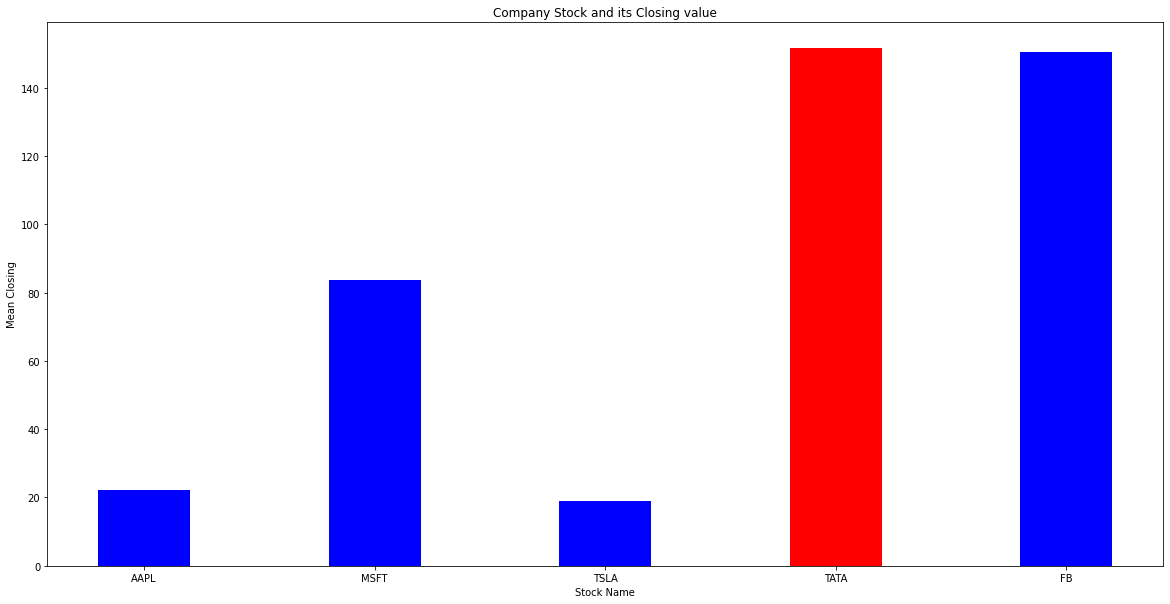

In [ ]:
x_axis = np.arange(len(stock_list))

colors = ['blue'] * len(stock_list)

index = np.where(close_stock == np.amax(close_stock))
colors.insert(index[0][0],'red')

plt.bar(x_axis, close_stock, width=0.4, label = 'Close', color=colors)
plt.xticks(x_axis, stock_list)

plt.title("Company Stock and its Closing value")
plt.xlabel("Stock Name")
plt.ylabel("Mean Closing")

plt.show()

Line graph for finding out the closing prices of each stock individually

From this graph, we can observe that the closing prices for Apple, Microsoft, and Tesla are rising but the prices for Tata and Facebook are decreasing.
Investors will more likely go for Tata and FB shares as their closing price is high.

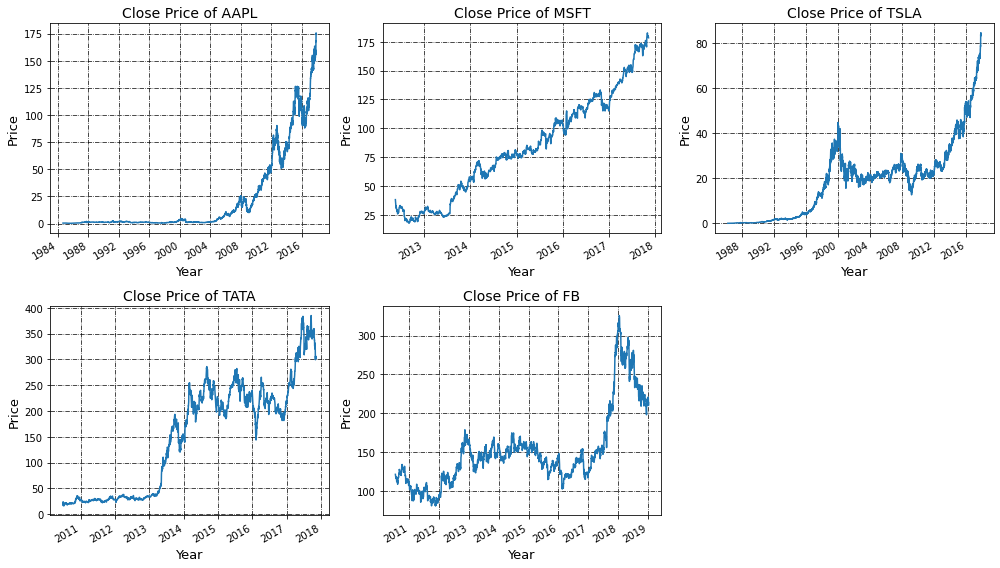

In [ ]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(top=1.5, bottom=1.4)
compList = [AAPL, FB, MSFT, TSLA, TATA]

for i, stock in enumerate(compList, 1):
  plt.subplot(2,3,i)
  stock['Close'].plot()

  plt.title("Close Price of %s" % stock_list[i - 1], fontsize=14)

  plt.ylabel('Price', fontsize=13)
  plt.xlabel('Year', fontsize=13)

  plt.grid(which="major", color='black', linestyle='-.', linewidth=0.7)

plt.tight_layout()

Line graph for finding out the total trade quantity or volume of each individual stock

From this graph, we can find that the volume / total trade quantity of Tata and Facebook stocks are higher than the rest during recent times.
Many traders have been investing in Tata and Facebook shares for profit.

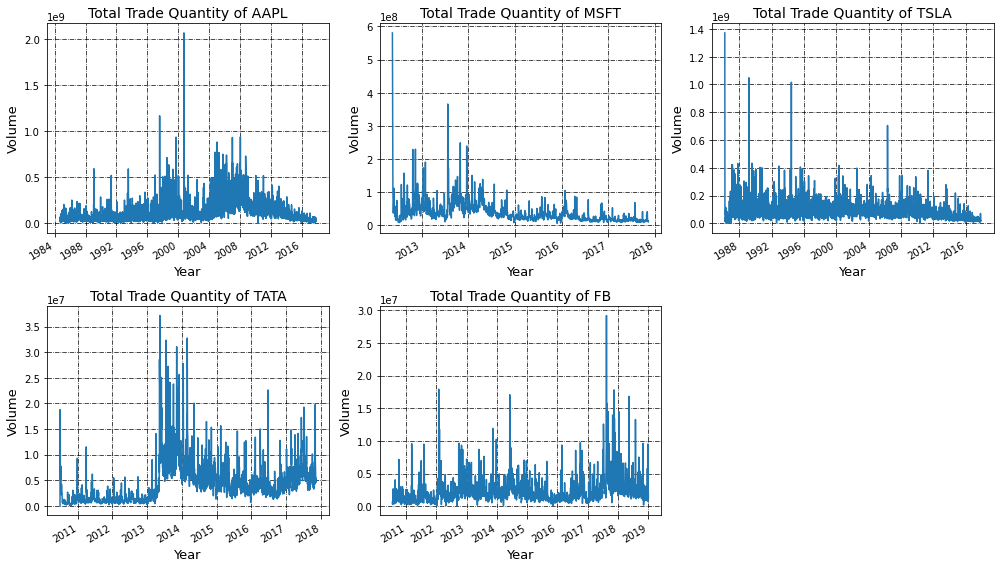

In [ ]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(top=1.5, bottom=1.4)
compList = [AAPL, FB, MSFT, TSLA, TATA]

for i, stock in enumerate(compList, 1):
  plt.subplot(2,3,i)
  stock['Volume'].plot()

  plt.title("Total Trade Quantity of %s" % stock_list[i - 1], fontsize=14)

  plt.ylabel('Volume', fontsize=13)
  plt.xlabel('Year', fontsize=13)

  plt.grid(which="major", color='black', linestyle='-.', linewidth=0.7)

plt.tight_layout()

Correlation Heatmap for AAPL Stock

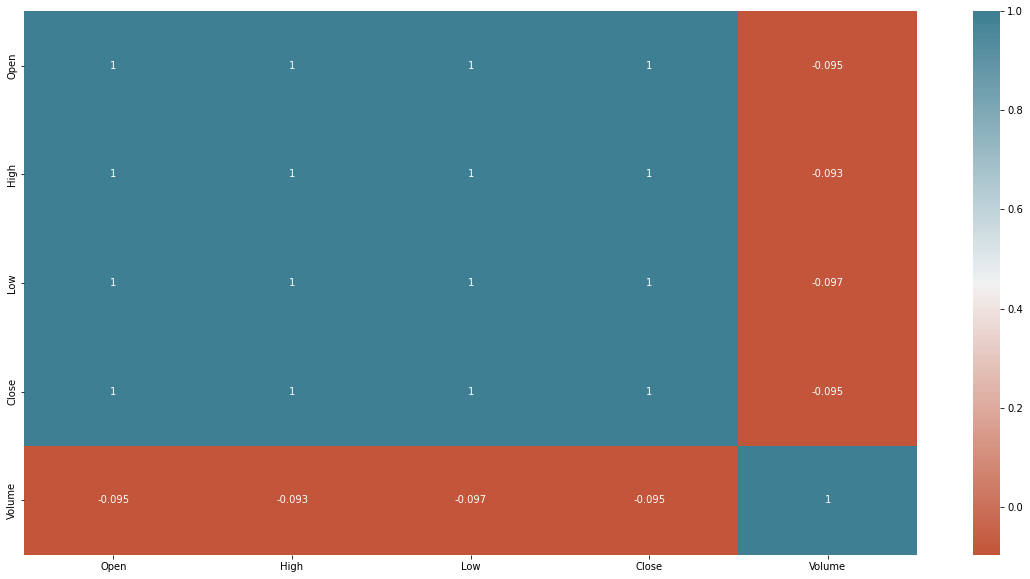

In [ ]:
sns.heatmap(AAPL.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n = 200))

Correlation Heatmap for FB Stock

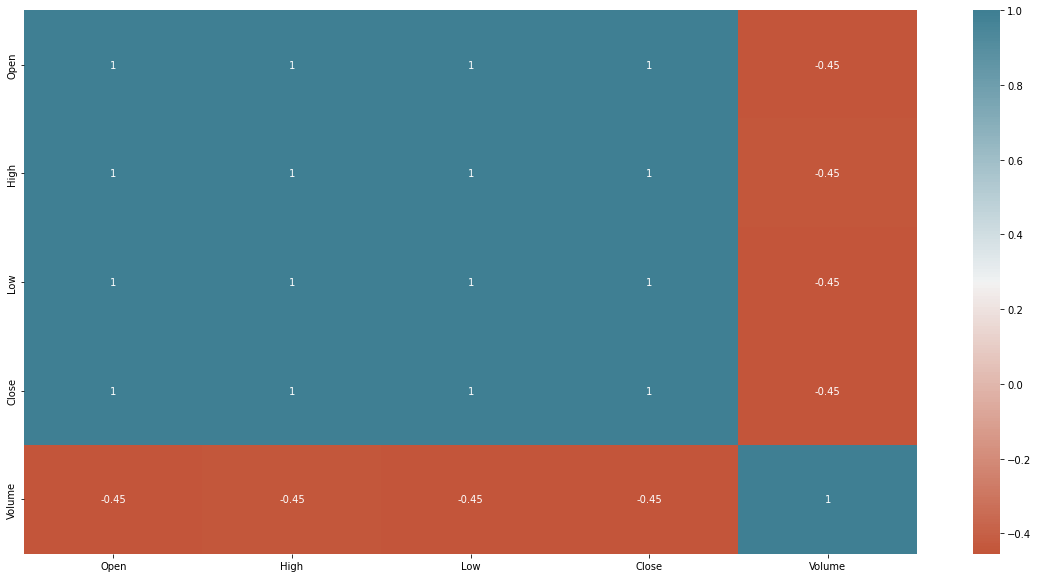

In [ ]:
sns.heatmap(FB.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n = 200))

Correlation Heatmap for MSFT Stock

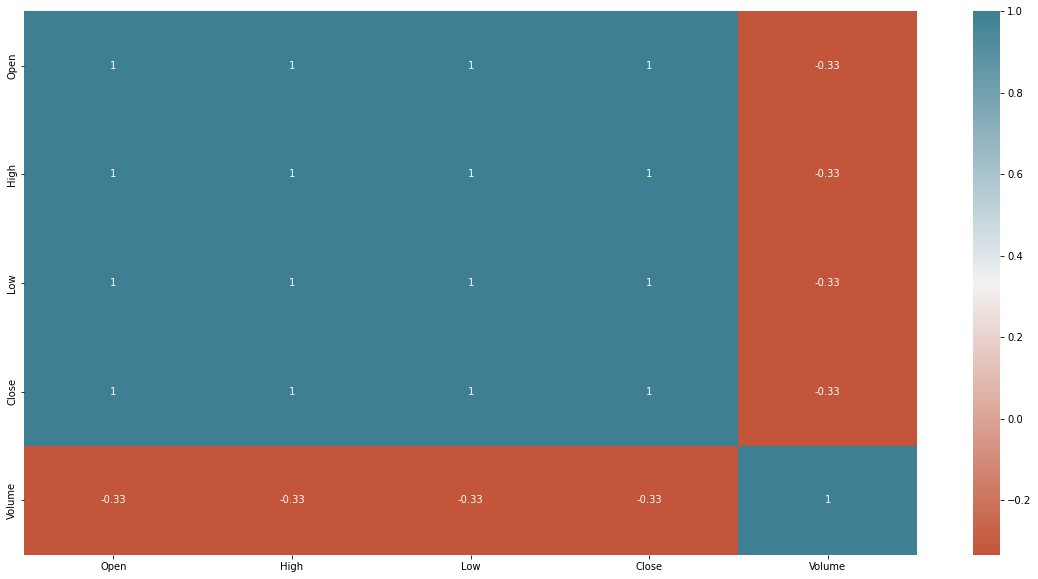

In [ ]:
sns.heatmap(MSFT.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n = 200))

Correlation Heatmap for TSLA Stock

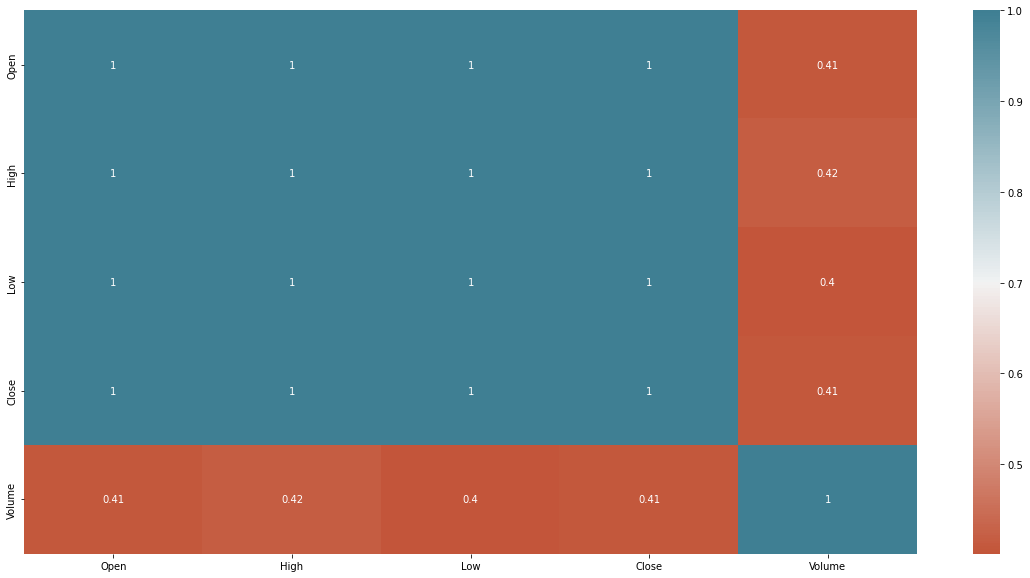

In [ ]:
sns.heatmap(TSLA.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n = 200))

Correlation Heatmap for TATA Stock

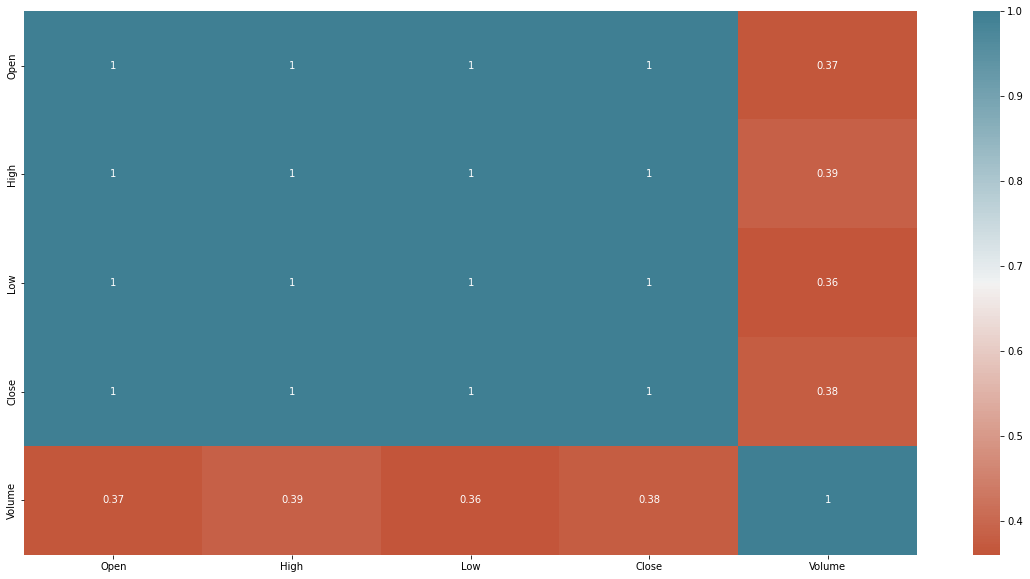

In [ ]:
sns.heatmap(TATA.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n = 200))

From the above correlation heatmaps of the stocks, we can observe that most of the features are highly correlated with each other and are essential for predictions

Correlation Matrix between each individual stock

In [ ]:
corr_df = pd.DataFrame()

corr_df = pd.concat([AAPL['Close'], MSFT['Close'], TSLA['Close'], TATA['Close'], FB['Close']], axis = 1, keys=['AAPL', 'MSFT', 'TSLA', 'TATA', 'FB'])
corr_df

,AAPL,MSFT,TSLA,TATA,FB
Date,,,,,
1984-09-07,0.42388,NaN,NaN,NaN,NaN
1984-09-10,0.42134,NaN,NaN,NaN,NaN
1984-09-11,0.42902,NaN,NaN,NaN,NaN
1984-09-12,0.41618,NaN,NaN,NaN,NaN
1984-09-13,0.43927,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-12-31,NaN,NaN,NaN,219.40,NaN
2019-01-01,NaN,NaN,NaN,219.10,NaN
2019-01-02,NaN,NaN,NaN,214.60,NaN


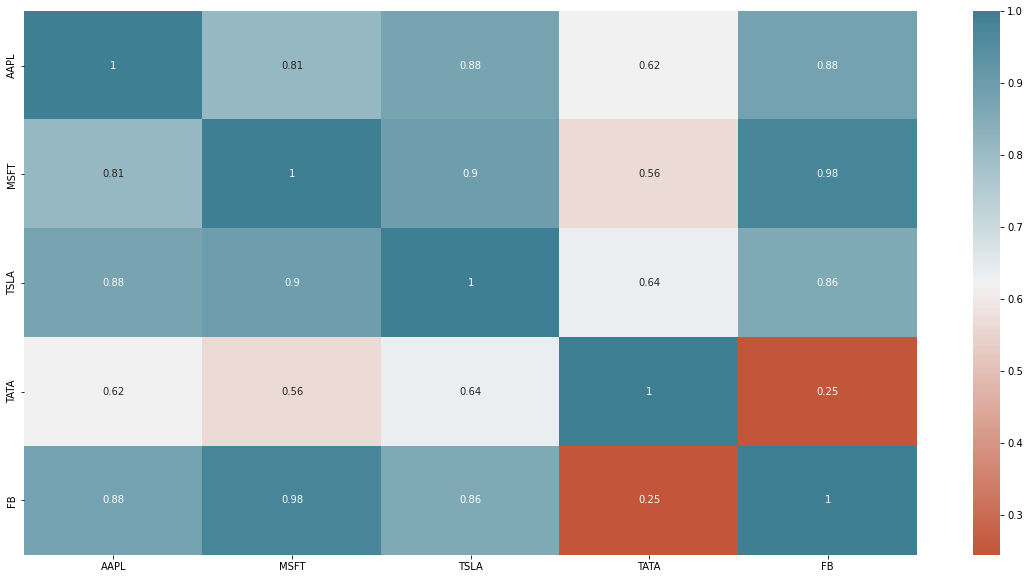

In [ ]:
sns.heatmap(corr_df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n = 200))

Plotting the closing price for all stock in one line graph

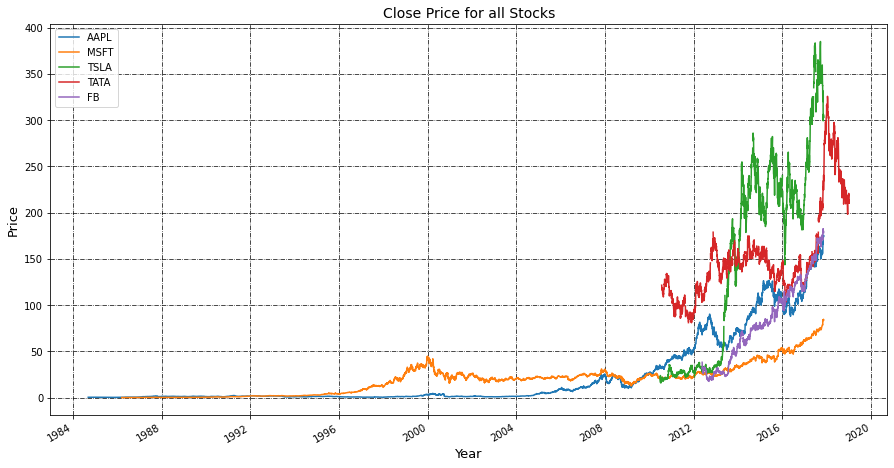

In [ ]:
corr_df.plot(figsize=(15, 8))

plt.legend()

plt.title("Close Price for all Stocks", fontsize=14)

plt.ylabel('Price', fontsize=13)
plt.xlabel('Year', fontsize=13)

plt.grid(which="major", color='black', linestyle='-.', linewidth=0.7)
plt.show()

Generating the new dataframes that include the Closing prices and the length of each stock for model training

In [ ]:
AAPL_Close = AAPL.filter(['Close'])
AAPL_Close_Values = AAPL_Close.values
trainAAPL = int(np.ceil( len(AAPL_Close_Values) * .95 ))

trainAAPL

7946

In [ ]:
FB_Close = FB.filter(['Close'])
FB_Close_Values = FB_Close.values
trainFB = int(np.ceil( len(FB_Close_Values) * .95 ))

trainFB

1312

In [ ]:
MSFT_Close = MSFT.filter(['Close'])
MSFT_Close_Values = MSFT_Close.values
trainMSFT = int(np.ceil( len(MSFT_Close_Values) * .95 ))

trainMSFT

7584

In [ ]:
TSLA_Close = TSLA.filter(['Close'])
TSLA_Close_Values = TSLA_Close.values
trainTSLA = int(np.ceil( len(TSLA_Close_Values) * .95 ))

trainTSLA

1766

In [ ]:
TATA_Close = TATA.filter(['Close'])
TATA_Close_Values = TATA_Close.values
trainTATA = int(np.ceil( len(TATA_Close_Values) * .95 ))

trainTATA

1995

Normalizing the new filtered dataframes with MinMaxScaler

In [ ]:
def scaleTrainTest(stockCloseValues, stockLen):
  scaled_data = scaler.fit_transform(stockCloseValues)
  train_data = scaled_data[0:int(stockLen), :]
  test_data = scaled_data[stockLen - 60: , :]

  x_train = []
  y_train = []
  x_test = []
  y_test = stockCloseValues[stockLen:, :]

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
      
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  return x_train, y_train, x_test, y_test

### Task Solving - Supervised (Regression)
### Target Feature - Close

### Making Dynamic LSTM model for each stock and plotting the graphs

Evaluation Metrics Used - MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), R Squared (R2), and MAPE (Mean Absolute Percentage Error)

In [ ]:
close_stock_list = [AAPL_Close, FB_Close, MSFT_Close, TATA_Close, TSLA_Close]

def trainModel(x_train, y_train, x_test, y_test, compName, stockLength, pos):
  lstm_model = Sequential()
  lstm_model.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
  lstm_model.add(LSTM(units = 64, return_sequences = False))
  lstm_model.add(Dense(25))
  lstm_model.add(Dense(1))

  lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  lstm_history = lstm_model.fit(x_train, y_train, epochs = 5, batch_size = 1, verbose = 2)
  lstm_model.summary()

  closing_test_price_yTrain = lstm_model.predict(x_train)
  closing_test_price_yTrain = scaler.inverse_transform(closing_test_price_yTrain)
  closing_test_price_yTest = lstm_model.predict(x_test)
  closing_test_price_yTest = scaler.inverse_transform(closing_test_price_yTest)

  # evaluate predictions
  maeTest = mean_absolute_error(y_test, closing_test_price_yTest)
  print('MAE TEST for %s Stock: %.3f' % (compName, maeTest))

  rmseTest = np.sqrt(mean_squared_error(y_test, closing_test_price_yTest))
  print("RMSE TEST for %s Stock: %.3f" % (compName, rmseTest))

  r2Test = r2_score(y_test, closing_test_price_yTest)
  print("R Squared TEST for %s Stock: %.3f" % (compName, r2Test))

  mape = mean_absolute_percentage_error(y_test, closing_test_price_yTest)
  print("MAPE TEST for %s Stock: %.3f" % (compName, mape))

  # Plot the data
  train = close_stock_list[pos][:stockLength]
  test = close_stock_list[pos][stockLength:]
  test['Predictions'] = closing_test_price_yTest

  # Visualize the data
  plt.figure(figsize=(16,8))
  plt.title('%s Stock LSTM Model' % compName)
  plt.xlabel('Date', fontsize=16)
  plt.ylabel('Close Price', fontsize=16)
  plt.plot(train['Close'])
  plt.plot(test[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

  # summarize history for loss
  plt.figure(figsize=(16,8))
  plt.plot(lstm_history.history['loss'])
  plt.title('Model Loss for Stock %s' % compName)
  plt.ylabel('Loss', fontsize=16)
  plt.xlabel('Epochs', fontsize=16)
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

### Visualizing predicted and actual values

Epoch 1/5
7886/7886 - 71s - loss: 4.4693e-04 - 71s/epoch - 9ms/step
Epoch 2/5
7886/7886 - 60s - loss: 1.2965e-04 - 60s/epoch - 8ms/step
Epoch 3/5
7886/7886 - 59s - loss: 9.7042e-05 - 59s/epoch - 7ms/step
Epoch 4/5
7886/7886 - 58s - loss: 7.7950e-05 - 58s/epoch - 7ms/step
Epoch 5/5
7886/7886 - 59s - loss: 6.5506e-05 - 59s/epoch - 7ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


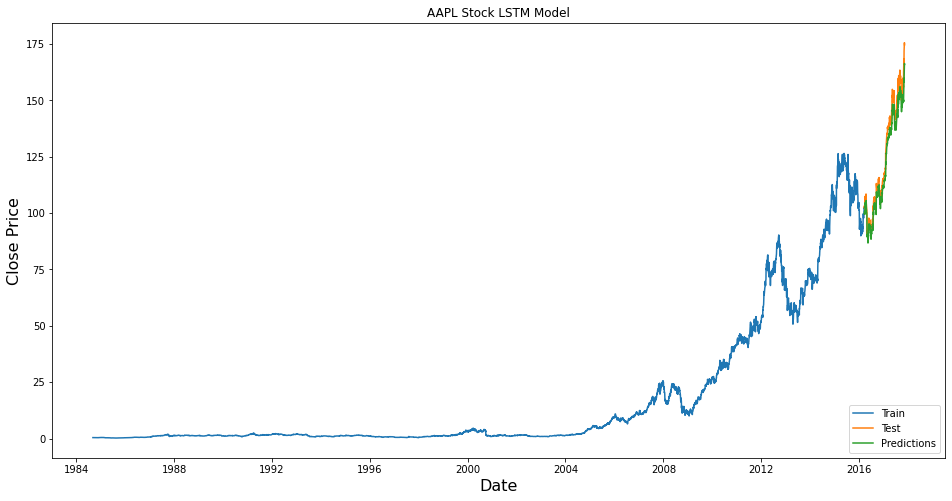

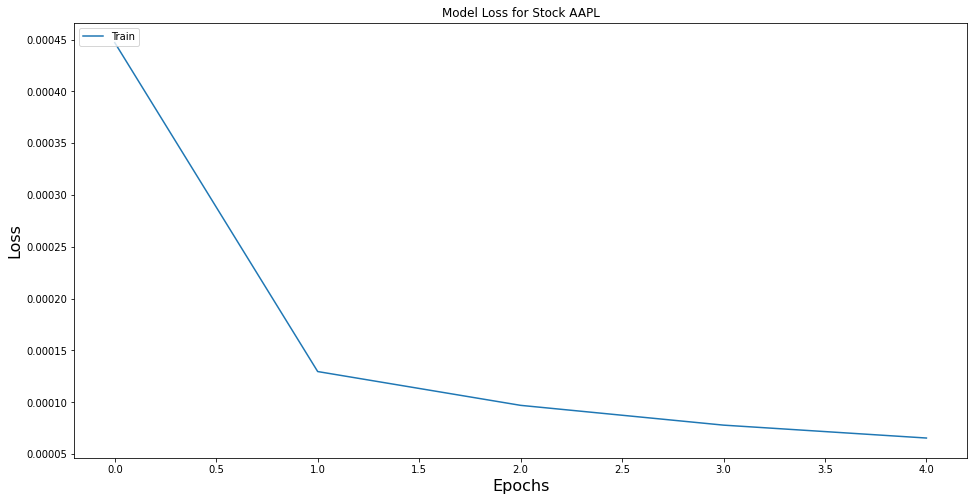

Epoch 1/5
1252/1252 - 12s - loss: 0.0013 - 12s/epoch - 9ms/step
Epoch 2/5
1252/1252 - 9s - loss: 4.8439e-04 - 9s/epoch - 7ms/step
Epoch 3/5
1252/1252 - 9s - loss: 4.2531e-04 - 9s/epoch - 7ms/step
Epoch 4/5
1252/1252 - 9s - loss: 4.2572e-04 - 9s/epoch - 7ms/step
Epoch 5/5
1252/1252 - 9s - loss: 3.1637e-04 - 9s/epoch - 7ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


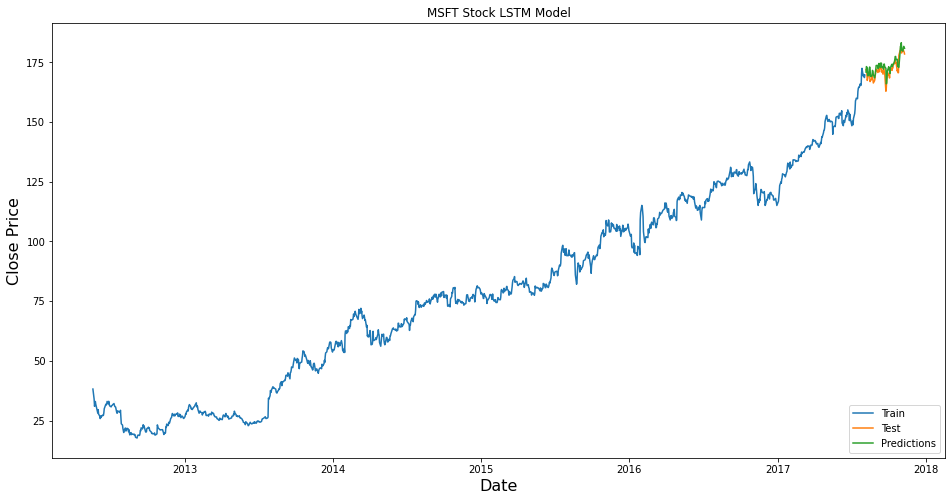

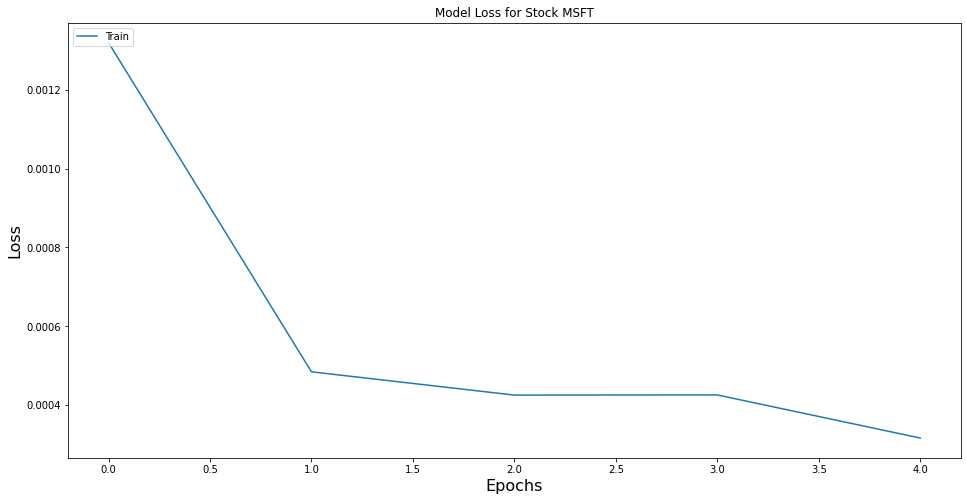

Epoch 1/5
7524/7524 - 58s - loss: 2.7964e-04 - 58s/epoch - 8ms/step
Epoch 2/5
7524/7524 - 56s - loss: 1.2271e-04 - 56s/epoch - 7ms/step
Epoch 3/5
7524/7524 - 56s - loss: 9.0306e-05 - 56s/epoch - 7ms/step
Epoch 4/5
7524/7524 - 56s - loss: 7.5825e-05 - 56s/epoch - 7ms/step
Epoch 5/5
7524/7524 - 56s - loss: 7.3744e-05 - 56s/epoch - 7ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


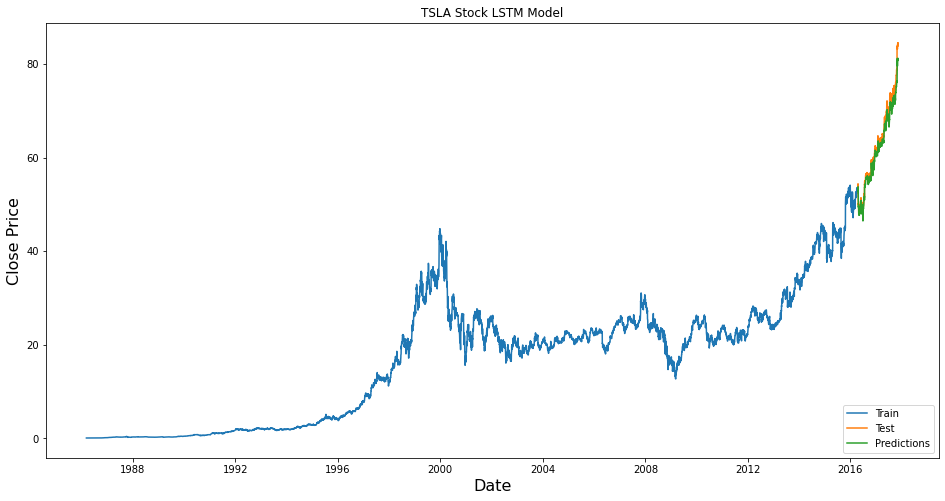

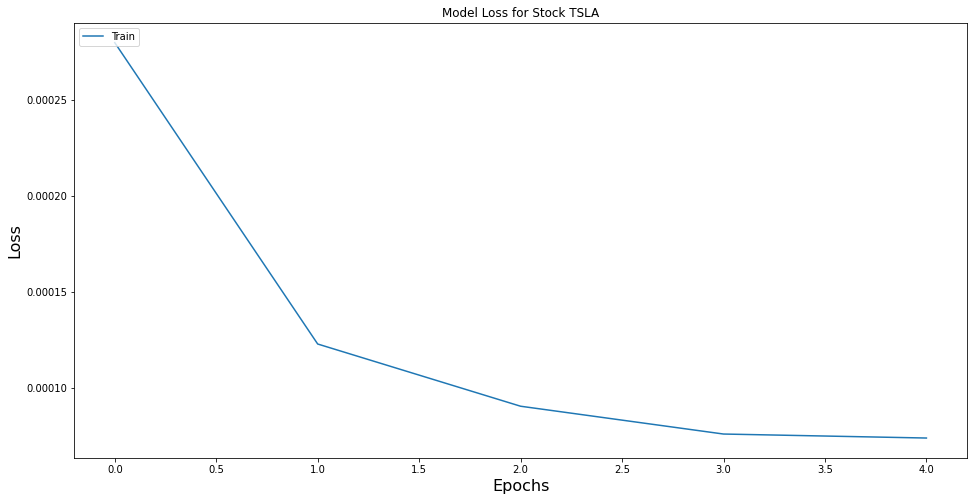

Epoch 1/5
1935/1935 - 17s - loss: 0.0015 - 17s/epoch - 9ms/step
Epoch 2/5
1935/1935 - 14s - loss: 6.5437e-04 - 14s/epoch - 7ms/step
Epoch 3/5
1935/1935 - 14s - loss: 6.6182e-04 - 14s/epoch - 7ms/step
Epoch 4/5
1935/1935 - 14s - loss: 5.9215e-04 - 14s/epoch - 7ms/step
Epoch 5/5
1935/1935 - 14s - loss: 4.9954e-04 - 14s/epoch - 7ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 25)                1625      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


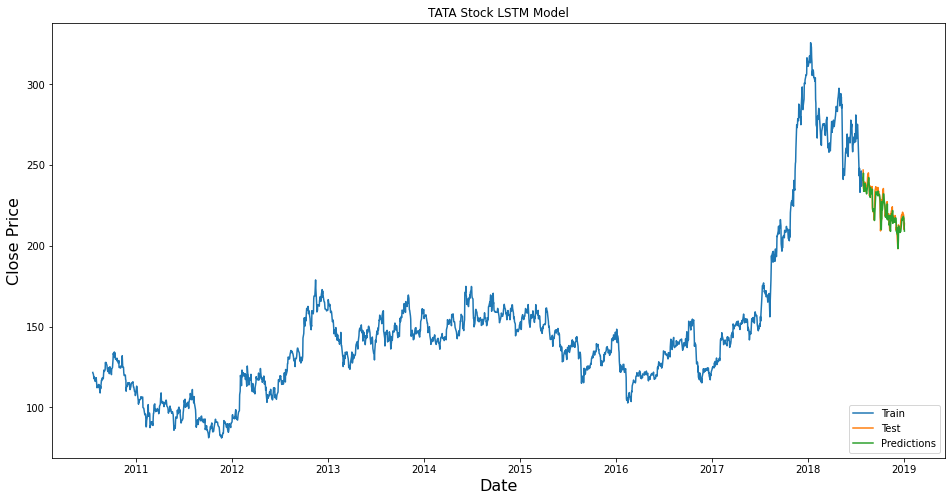

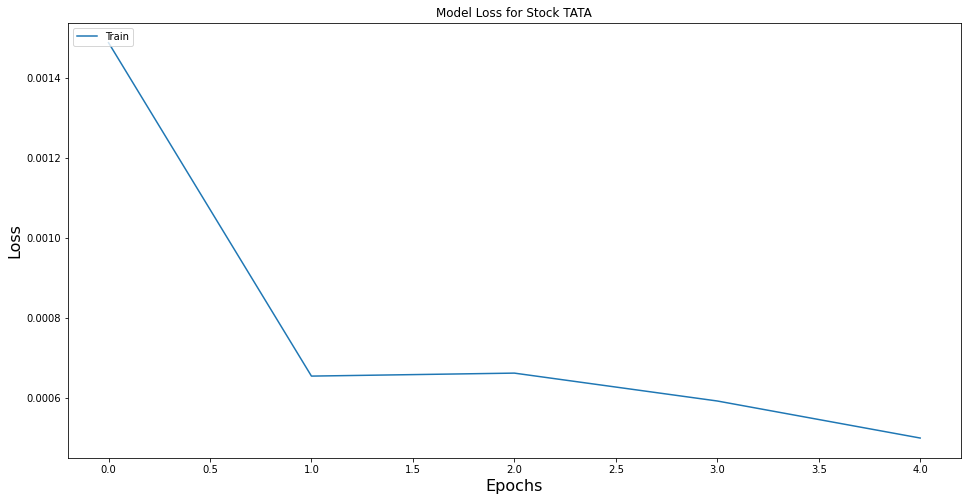

Epoch 1/5
1706/1706 - 15s - loss: 0.0016 - 15s/epoch - 9ms/step
Epoch 2/5
1706/1706 - 13s - loss: 7.6978e-04 - 13s/epoch - 7ms/step
Epoch 3/5
1706/1706 - 13s - loss: 4.8063e-04 - 13s/epoch - 7ms/step
Epoch 4/5
1706/1706 - 13s - loss: 4.1123e-04 - 13s/epoch - 8ms/step
Epoch 5/5
1706/1706 - 13s - loss: 4.1567e-04 - 13s/epoch - 7ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 25)                1625      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


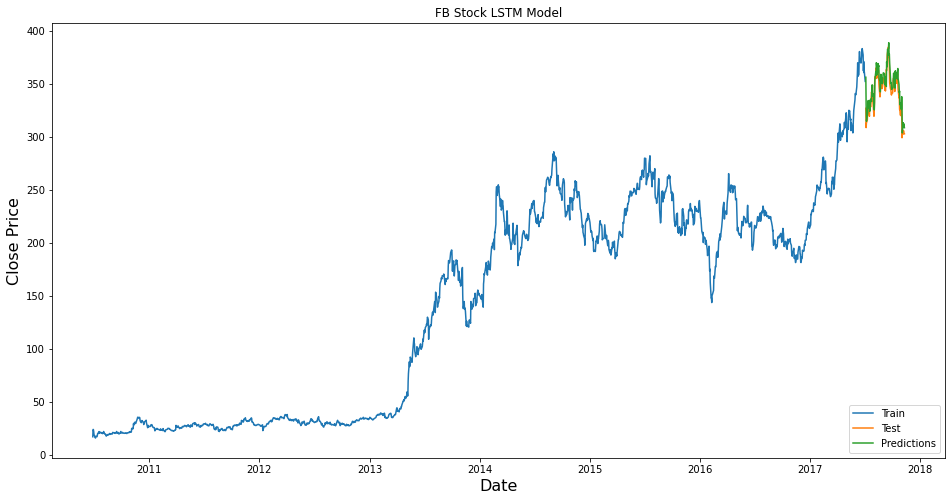

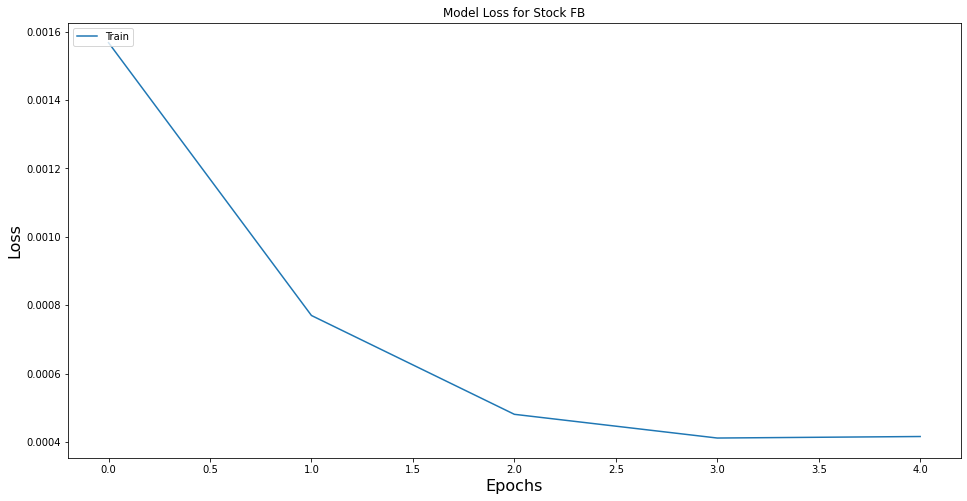

In [ ]:
close_stock_list_values = [AAPL_Close_Values, FB_Close_Values, MSFT_Close_Values, TATA_Close_Values, TSLA_Close_Values]
position = 0

for stockClose in close_stock_list_values:
  stockLength = int(np.ceil( len(stockClose) * .95 ))
  result = scaleTrainTest(stockClose, stockLength)
  x_train = result[0]
  y_train = result[1]
  x_test = result[2]
  y_test = result[3]
  trainModel(x_train, y_train, x_test, y_test, stock_list[position], stockLength, position)
  position = position + 1

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='1'></a>
2. https://www.statology.org/pandas-rename-columns/ <a id='2'></a>
3. https://datacarpentry.org/python-socialsci/11-joins/index.html <a id='3'></a>
4. https://www.geeksforgeeks.org/merge-two-dataframes-with-same-column-names <a id='4'></a>
5. https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/ <a id='5'></a>
6. https://www.codegrepper.com/code-examples/python/pandas+dataframe+add+two+columns+int+and+string <a id='6'></a>
7. https://sparkbyexamples.com/pandas/pandas-extract-column-value-based-on-another-column/ <a id='7'></a>
8. https://stackoverflow.com/questions/31121344/sorting-pandas-dataframe-data-within-groupby-groups <a id='8'></a>
9. https://data.nasdaq.com/data/NSE/TATAGLOBAL-tata-global-beverages-limited <a id='9'></a>
10. https://raw.githubusercontent.com/pierpaolo28/Data-Visualization/master/Dash/stock_data.csv <a id='10'></a>

